> 话不多说，具体实现效果

![multi](image/multi_anchor.gif)

In [36]:
# 基本库
from matplotlib import pyplot as plt
from utils.bbox import *
from utils.plt_tools import *
import numpy as np
import torch

In [37]:
# img = plt.imread('./image/catdog.jpg')
# # 打印img基本信息
# print(img.shape, img.dtype)

In [38]:
from PIL import Image
# 读取图像
img = Image.open('./image/catdog.jpg')
print(img.size, img.mode, img.format)
img = np.array(img)

(728, 561) RGB JPEG


In [39]:
def display_anchors(img, fmap_w, fmap_h, sizes=[0.15], ratios=[1, 2, 0.5]):
    """
    显示不同尺寸的锚框
    @param img: 图像
    @param fmap_w: 特征图宽度
    @param fmap_h: 特征图高度
    @param sizes: 缩放比例列表
    @param ratios: 长宽比列表
    @return: None
    """
    w, h = img.shape[1], img.shape[0]
    plt.figure(figsize=(3.5, 3.5))
    # 前两个维度上的值不影响输出
    fmap = torch.zeros((1, 5, fmap_h, fmap_w)) # m, c, h, w
    anchors = multibox_prior(fmap, sizes, ratios)
    bbox_scale = torch.tensor((w, h, w, h))
    show_bboxes(plt.imshow(img).axes, anchors[0] * bbox_scale)
    

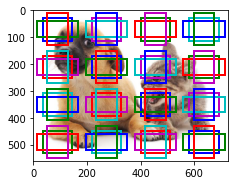

In [40]:
display_anchors(img, fmap_w=4, fmap_h=4)

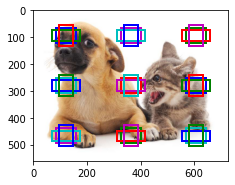

In [41]:
display_anchors(img, fmap_w=3, fmap_h=3,sizes=[0.1], ratios=[1, 2, 0.5])

In [42]:
# 使用gradio来构建一个简单的交互式界面
import gradio as gr

def process(img, fmap_w=4, fmap_h=4, sizes=[0.15], ratios=[1, 2, 0.5]):
    display_anchors(img, fmap_w, fmap_h, sizes, ratios)
    return plt.gcf()

with gr.Blocks() as demo:
    gr.Markdown("""
    # 多尺度锚框

    本示例展示了如何使用多尺度锚框来检测不同大小的目标。具体的代码是参考了d2l的[多尺度锚框](https://zh-v2.d2l.ai/chapter_computer-vision/multiscale-object-detection.html)一节。

    这里使用了gradio来构建一个简单的交互式界面，你可以通过调整参数来查看不同的结果。

    """)

    with gr.Row():
        img = gr.inputs.Image(label="图像")
        img_with_anchors = gr.Plot()
    
    with gr.Row():
        fmap_w = gr.inputs.Slider(minimum=1, maximum=10, default=4, step=1, label="特征图宽度fmap_w")
        fmap_h = gr.inputs.Slider(minimum=1, maximum=10, default=4, step=1, label="特征图高度fmap_h")
    with gr.Row():
        sizes = gr.inputs.CheckboxGroup([0.1, 0.15, 0.2, 0.4, 0.8],
                                        label="缩放比例sizes")
        # sizes = gr.inputs.CheckboxGroup([0.2, 0.272, 0.37, 0.447, 0.54, 0.619, 0.71, 0.79, 0.88, 0.961],
        #                                 label="缩放比例sizes")
        ratios = gr.inputs.CheckboxGroup([1, 2, 0.5, 4, 0.25],
                                         label="长宽比ratios")
    
    

    run_btn = gr.Button(label="运行")
    

    img_example = gr.Examples([
        ["./image/catdog.jpg"],
        ["./image/dog.jpg"],
        ["./image/cat.jpg"],
    ], label="示例",inputs=[img, fmap_w, fmap_h, sizes, ratios], outputs=img_with_anchors)

    
    run_btn.click(
        process,
        inputs=[
            img,
            fmap_w,
            fmap_h,
            sizes,
            ratios
        ],
        outputs=img_with_anchors
    )

demo.launch()


d:\anaconda\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
d:\anaconda\lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
d:\anaconda\lib\site-packages\gradio\inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
d:\anaconda\lib\site-packages\gradio\inputs.py:93: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
d:\anaconda\lib\site-packages\gradio\inputs.py:151: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
d:\anaconda\lib\site-packages\gradio\inputs.py:154: UserWarning: `optional` par

Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "d:\anaconda\lib\site-packages\gradio\routes.py", line 437, in run_predict
    output = await app.get_blocks().process_api(
  File "d:\anaconda\lib\site-packages\gradio\blocks.py", line 1352, in process_api
    result = await self.call_function(
  File "d:\anaconda\lib\site-packages\gradio\blocks.py", line 1077, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "d:\anaconda\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "d:\anaconda\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "d:\anaconda\lib\site-packages\anyio\_backends\_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "C:\Users\dongl\AppData\Local\Temp/ipykernel_19956/887269255.py", line 5, in process
    display_anchors(img, fmap_w, fmap_h, sizes, ratios)
  File "C:\Users\dongl\AppData\Local\